In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('student_data.csv')

In [3]:
# Data Preprocessing
df['socioeconomic'] = df['socioeconomic'].map({'rural': 0, 'urban': 1}) # Convert categorical to numerical
X = df[['study_hours', 'attendance', 'socioeconomic']]
y = df['exam_score']

In [4]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Model Evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 243.7031659498901
R-squared: -0.013276645253378572


In [7]:
# Interpreting Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nCoefficients:")
print(coefficients)


Coefficients:
         Feature  Coefficient
0    study_hours     0.050262
1     attendance    -8.272916
2  socioeconomic    -1.289244


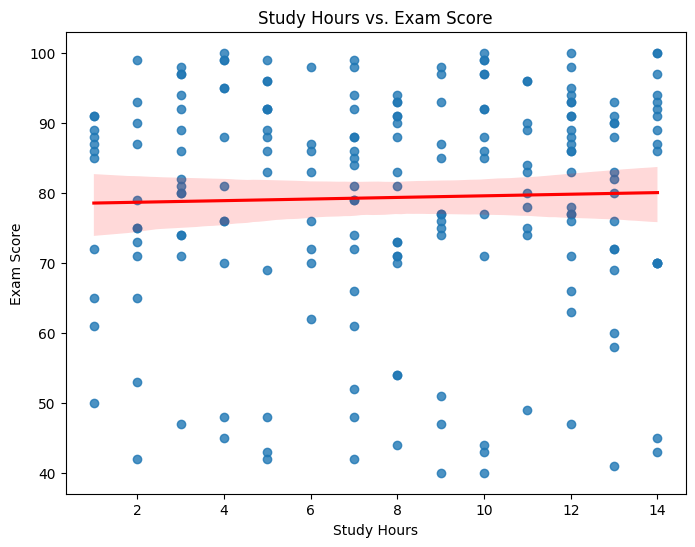

In [8]:
# Visualization (example - scatter plot for study hours)
plt.figure(figsize=(8, 6))
sns.regplot(x='study_hours', y='exam_score', data=df, line_kws={"color": "red"})
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('Study Hours vs. Exam Score')
plt.show()